In [1]:
#Aim:-To perform Outlier Detection and Removal Using IQR

In [2]:
#Name : Shravani N.Mahalle
#Roll no. : 17 
#Section : B 
#Subject : PE-II

In [3]:
import pandas as pd
df = pd.read_csv("height.csv")
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [4]:
df.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<h3 style='color:purple'>Detect outliers using IQR<h3>

In [5]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(np.float64(63.505620480000005), np.float64(69.17426172750001))

In [6]:
IQR = Q3 - Q1
IQR

np.float64(5.668641247500005)

In [7]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(55.00265860875), np.float64(77.67722359875002))

**Here are the outliers**

In [8]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


<h3 style='color:purple'>Remove outliers<h3>

In [9]:
df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [10]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [11]:
df = pd.read_csv("height.csv")
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [12]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

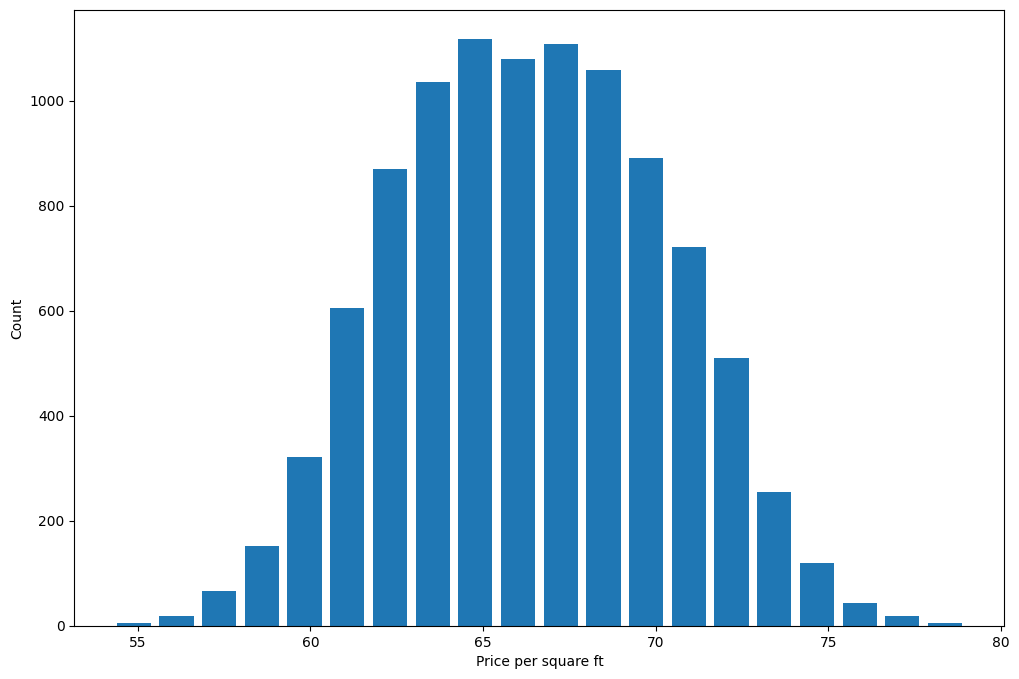

In [13]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

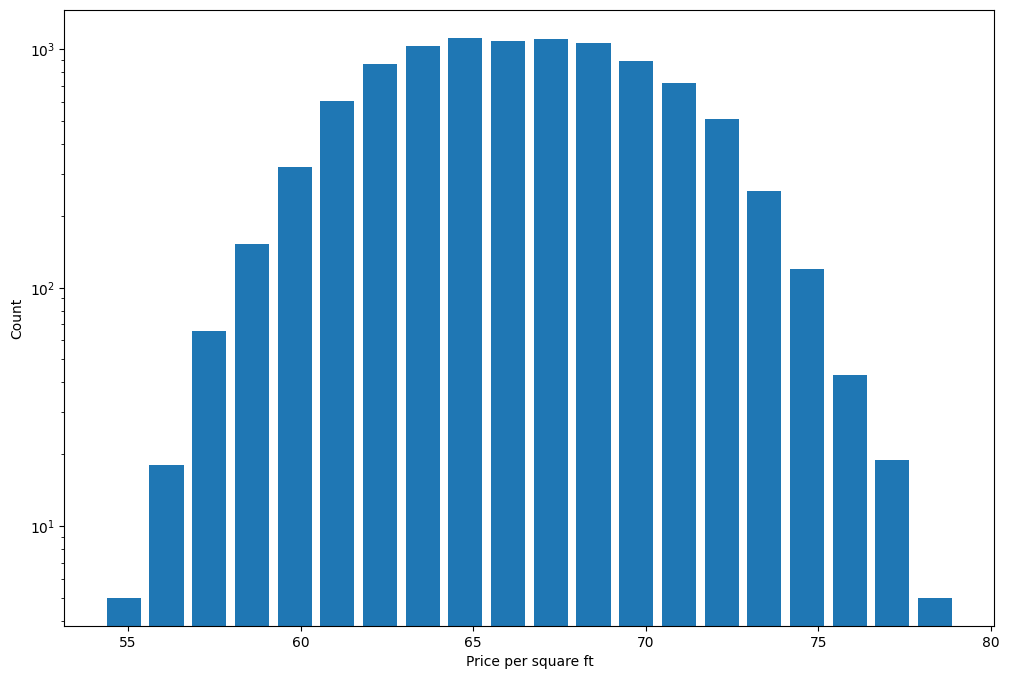

In [14]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

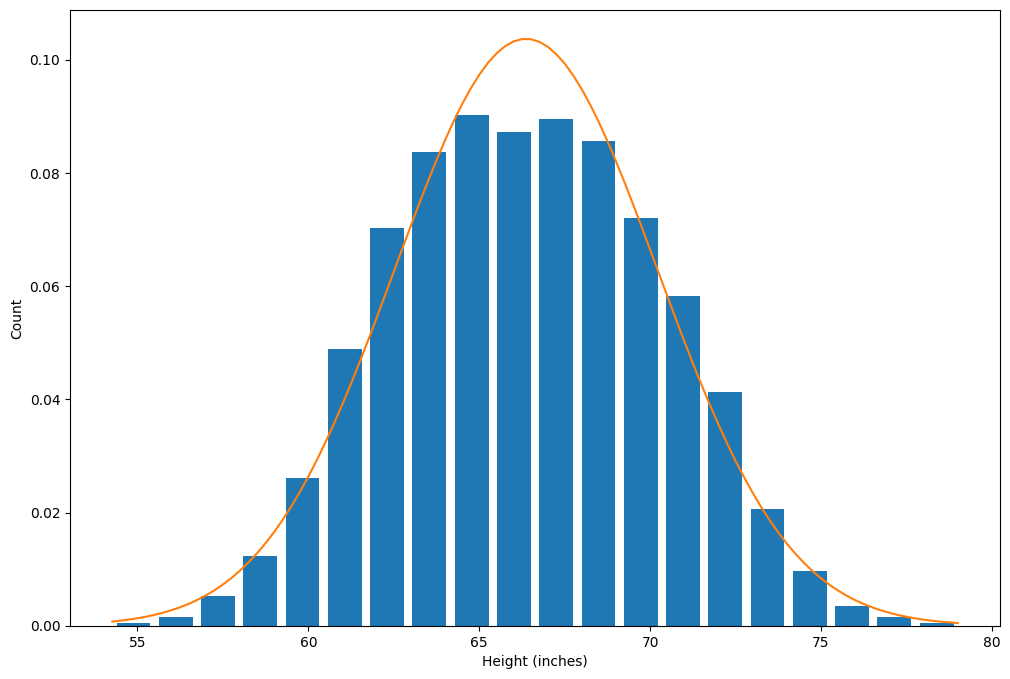

In [15]:
from scipy.stats import norm
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.linspace(54.263133, df.Height.max(), 100)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

# Treat outliers using percentile first

In [16]:
lower_limit, upper_limit = df.Height.quantile([0.001, 0.999])
lower_limit, upper_limit

(56.066548911530006, 77.06738853708)

In [17]:
outliers = df[(df.Height>upper_limit) | (df.Height<lower_limit)]
outliers.sample(10)

,Gender,Height
9825,Female,55.979198
3285,Male,78.528210
6176,Female,55.851214
3757,Male,78.621374
2070,Male,77.465569
6624,Female,54.616858
6625,Female,55.739737
4297,Male,77.100872
2014,Male,78.998742
8692,Female,55.651892


In [18]:
df2 = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df2.shape

(9980, 2)

In [19]:
df.shape

(10000, 2)

In [20]:
df.shape[0] - df2.shape[0]

20

# Remove outliers using 4 standard deviation

In [21]:
max_limit = df.Height.mean() + 4*df.Height.std()
min_limit = df.Height.mean() - 4*df.Height.std()
max_limit, min_limit

(np.float64(81.75767223804829), np.float64(50.9774472716837))

In [22]:
max_limit = df2.Height.mean() + 3 * df2.Height.std()
min_limit = df2.Height.mean() - 3 * df2.Height.std()


In [23]:
df[(df.Height>max_limit) | (df.Height<min_limit)].sample(5)

,Gender,Height
9285,Female,54.263133
1317,Male,78.462053
7294,Female,54.873728
3285,Male,78.528210
994,Male,78.095867


In [24]:
df = df[(df.Height>min_limit) & (df.Height<max_limit)]
df.shape

(9992, 2)

In [25]:
df.shape[0]-df.shape[0]

0

# Remove outliers using z score. Use z score of 4 as your thresold

In [26]:
df['zscore'] = (df.Height-df.Height.mean())/df.Height.std()
df.sample(10)

,Gender,Height,zscore
7612,Female,69.641771,0.854664
2045,Male,66.856717,0.128251
5975,Female,60.257493,-1.592995
807,Male,65.834420,-0.138390
4197,Male,69.351832,0.779041
3406,Male,66.166533,-0.051767
7877,Female,63.626958,-0.714153
5338,Female,65.904744,-0.120048
1881,Male,66.933078,0.148168
7702,Female,66.650873,0.074562


In [27]:
outliers_z = df[(df.zscore < -4) | (df.zscore>4)]
outliers_z.shape

(0, 3)

In [28]:
outliers_z.sample(0)

,Gender,Height,zscore
